In [113]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

#creating a dataframe with the data and looking at the first 5 rows
df = pd.read_csv('data2/telco_churn.csv')
df.head(5)

#looking at shape of dataset it is 100,000 rows by 100 columns
df.shape

#describing the dataset 
df.describe()

#type of data in each column 
df.info()

#dropping Customer ID as it will not determine the probability of a customer churning
df.drop('Customer_ID', axis = 1, inplace = True)
df.info()


#seperating into 3 groups: float, int and object for visualization
df_categorical = [col for col in df.columns if df[col].dtype == 'object']
df_integer = [col for col in df.columns if df[col].dtype == 'int64']
df_float = [col for col in df.columns if df[col].dtype == 'float64']  



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        99109 non-null   float64
 10  change_rev        99109 non-null   float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     10

In [114]:
# Checking for null entries
print(df.isnull().sum())

#columns with missing values 
null_val = df.isnull().sum().sort_values(ascending = False).head(11)
percent = (null_val/len(df))*100




# Percentage of missing values
pd.DataFrame({'Number of missing values': null_val, 'Percentage of missing data': percent})


rev_Mean        357
mou_Mean        357
totmrc_Mean     357
da_Mean         357
ovrmou_Mean     357
               ... 
kid6_10        1732
kid11_15       1732
kid16_17       1732
creditcd       1732
eqpdays           1
Length: 99, dtype: int64


,Number of missing values,Percentage of missing data
numbcars,49366,49.366
dwllsize,38308,38.308
HHstatin,37923,37.923
ownrent,33706,33.706
dwlltype,31909,31.909
lor,30190,30.190
income,25436,25.436
adults,23019,23.019
infobase,22079,22.079
hnd_webcap,10189,10.189


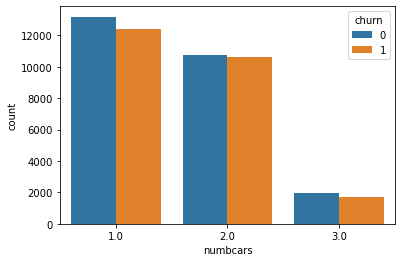

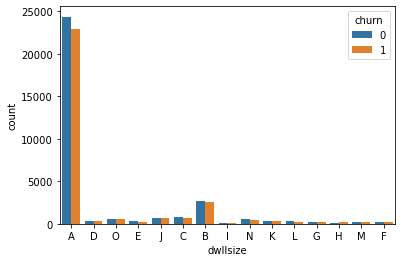

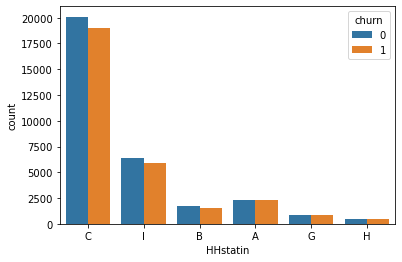

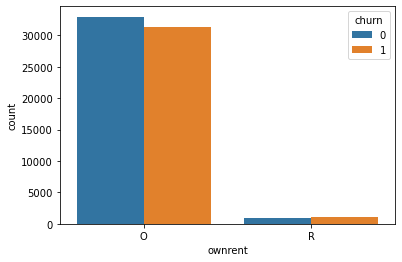

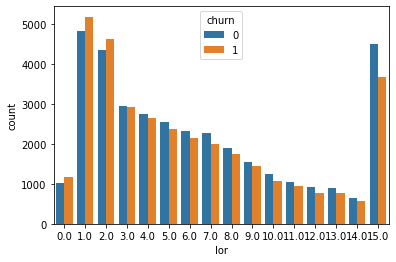

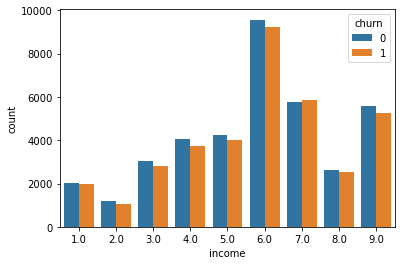

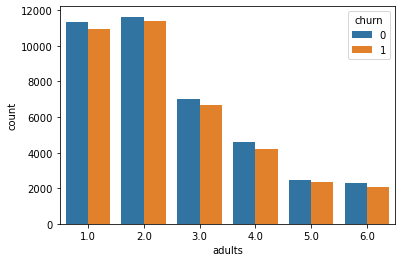

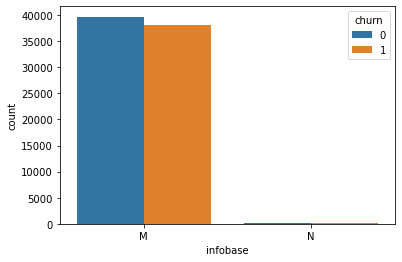

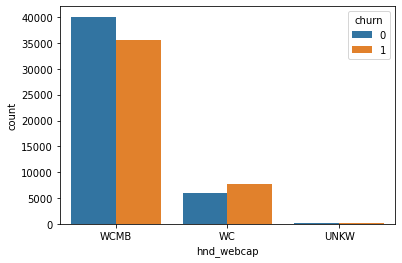

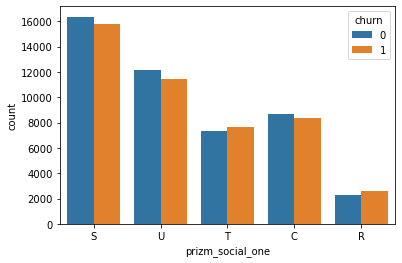

churn,0,1
prizm_social_one,,
C,0.509226,0.490774
R,0.472932,0.527068
S,0.509238,0.490762
T,0.491627,0.508373
U,0.515182,0.484818


In [115]:
#visualizing the features with the most missing values against the churn 
sns.countplot(x= "numbcars", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('numbcars')["churn"].value_counts(normalize=True).unstack(fill_value=0)

sns.countplot(x= "dwllsize", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('dwllsize')["churn"].value_counts(normalize=True).unstack(fill_value=0)


sns.countplot(x= "HHstatin", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('HHstatin')["churn"].value_counts(normalize=True).unstack(fill_value=0)

sns.countplot(x= "ownrent", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('ownrent')["churn"].value_counts(normalize=True).unstack(fill_value=0)

sns.countplot(x= "lor", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('lor')["churn"].value_counts(normalize=True).unstack(fill_value=0)

sns.countplot(x= "income", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('income')["churn"].value_counts(normalize=True).unstack(fill_value=0)

sns.countplot(x= "adults", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('adults')["churn"].value_counts(normalize=True).unstack(fill_value=0)

sns.countplot(x= "infobase", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('infobase')["churn"].value_counts(normalize=True).unstack(fill_value=0)

sns.countplot(x= "hnd_webcap", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('hnd_webcap')["churn"].value_counts(normalize=True).unstack(fill_value=0)

sns.countplot(x= "prizm_social_one", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('prizm_social_one')["churn"].value_counts(normalize=True).unstack(fill_value=0)


<function matplotlib.pyplot.show(close=None, block=None)>

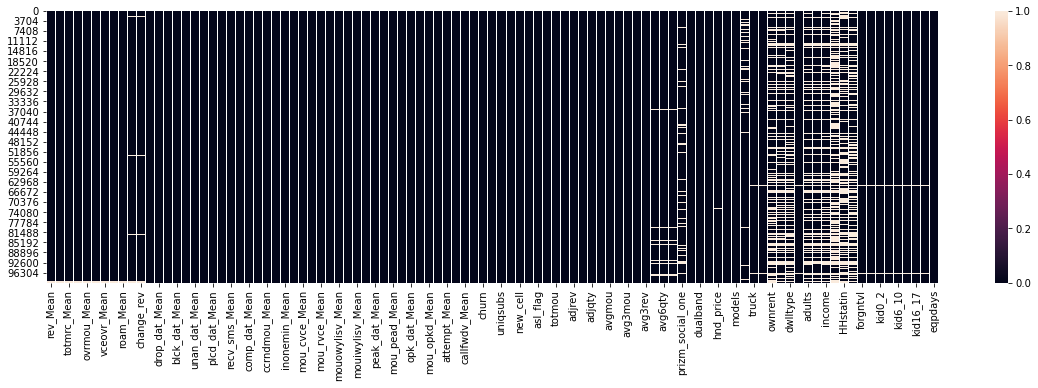

In [116]:
plt.figure(figsize=(20, 5))
sns.heatmap(df.isnull())
plt.show

In [117]:
df.drop(['numbcars','dwllsize','HHstatin','ownrent','dwlltype','lor',
         'income','adults','infobase','prizm_social_one',],axis=1,inplace=True)

In [118]:
df.shape

(100000, 89)

ValueError: num must be 1 <= num <= 1, not 2

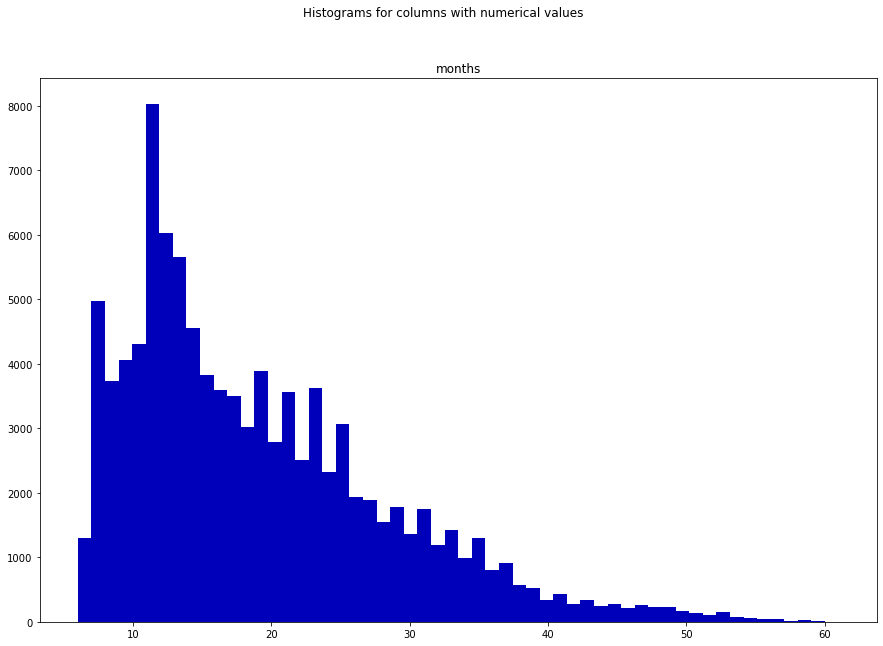

In [101]:
#plotting all numerical values into a histogram
num_hist = df[['months', 'uniqsubs','actvsubs','totcalls','adjqty','avg3mou','avg3qty','avg3rev','rev_Mean',
 'mou_Mean',
 'totmrc_Mean',
 'da_Mean',
 'ovrmou_Mean',
 'ovrrev_Mean',
 'vceovr_Mean',
 'datovr_Mean',
 'roam_Mean',
 'change_mou',
 'change_rev',
 'drop_vce_Mean',
 'drop_dat_Mean',
 'blck_vce_Mean',
 'blck_dat_Mean',
 'unan_vce_Mean',
 'unan_dat_Mean',
 'plcd_vce_Mean',
 'plcd_dat_Mean',
 'recv_vce_Mean',
 'recv_sms_Mean',
 'comp_vce_Mean',
 'comp_dat_Mean',
 'custcare_Mean',
 'ccrndmou_Mean',
 'cc_mou_Mean',
 'inonemin_Mean',
 'threeway_Mean',
 'mou_cvce_Mean',
 'mou_cdat_Mean',
 'mou_rvce_Mean',
 'owylis_vce_Mean',
 'mouowylisv_Mean',
 'iwylis_vce_Mean',
 'mouiwylisv_Mean',
 'peak_vce_Mean',
 'peak_dat_Mean',
 'mou_peav_Mean',
 'mou_pead_Mean',
 'opk_vce_Mean',
 'opk_dat_Mean',
 'mou_opkv_Mean',
 'mou_opkd_Mean',
 'drop_blk_Mean',
 'attempt_Mean',
 'complete_Mean',
 'callfwdv_Mean',
 'callwait_Mean',
 'totmou',
 'totrev',
 'adjrev',
 'adjmou',
 'avgrev',
 'avgmou',
 'avgqty',
 'avg6mou',
 'avg6qty',
 'avg6rev',
 'hnd_price',
 'phones',
 'models',
 'truck',
 'rv',
 'forgntvl',
 'eqpdays']]

fig1 = plt.figure(1, figsize=(15, 10))
plt.suptitle('Histograms for columns with numerical values \n')

for i in range(num_hist.shape[1]):
    plt.subplot(1, 1, i + 1)
    f = plt.gca()
    f.set_title(num_hist.columns.values[i])
    vals = np.size(num_hist.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    plt.hist(num_hist.iloc[:, i], bins=vals, color = '#0000BB')

plt.tight_layout(rect=[0, 0.05, 1, 0.95])  


In [89]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for a in features:
        # 1st quartile
        Q1 = df.quantile(0.25)
        # 3rd quartile
        Q3 = np.quantile(0.75)
        # IQR
        IQR = Q3 - Q1
        # upper limit 
        UL = Q1 + 3*IQR
        #lower limit 
        LL = Q1 - 3*IQR
        # detect outlier and their indices
        outlier_list = df[(df[a] < Q1 - LL) | (df[a] > Q3 + UL)].index
        # store indices
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return outlier_indices



['actvsubs', 'avg3qty', 'avg3rev', 'avg6rev', 'avgmou', 'avgqty', 'callwait_Mean', 'ccrndmou_Mean', 'change_mou', 'churn', 'custcare_Mean', 'da_Mean', 'drop_blk_Mean', 'drop_vce_Mean', 'eqpdays', 'hnd_price', 'iwylis_vce_Mean', 'models', 'months', 'mou_Mean', 'mou_cvce_Mean', 'mou_opkv_Mean', 'mou_peav_Mean', 'mou_rvce_Mean', 'mouiwylisv_Mean', 'mouowylisv_Mean', 'opk_vce_Mean', 'ovrmou_Mean', 'owylis_vce_Mean', 'peak_vce_Mean', 'phones', 'plcd_vce_Mean', 'recv_vce_Mean', 'rev_Mean', 'threeway_Mean', 'totcalls', 'totmou', 'totmrc_Mean', 'unan_vce_Mean', 'uniqsubs']


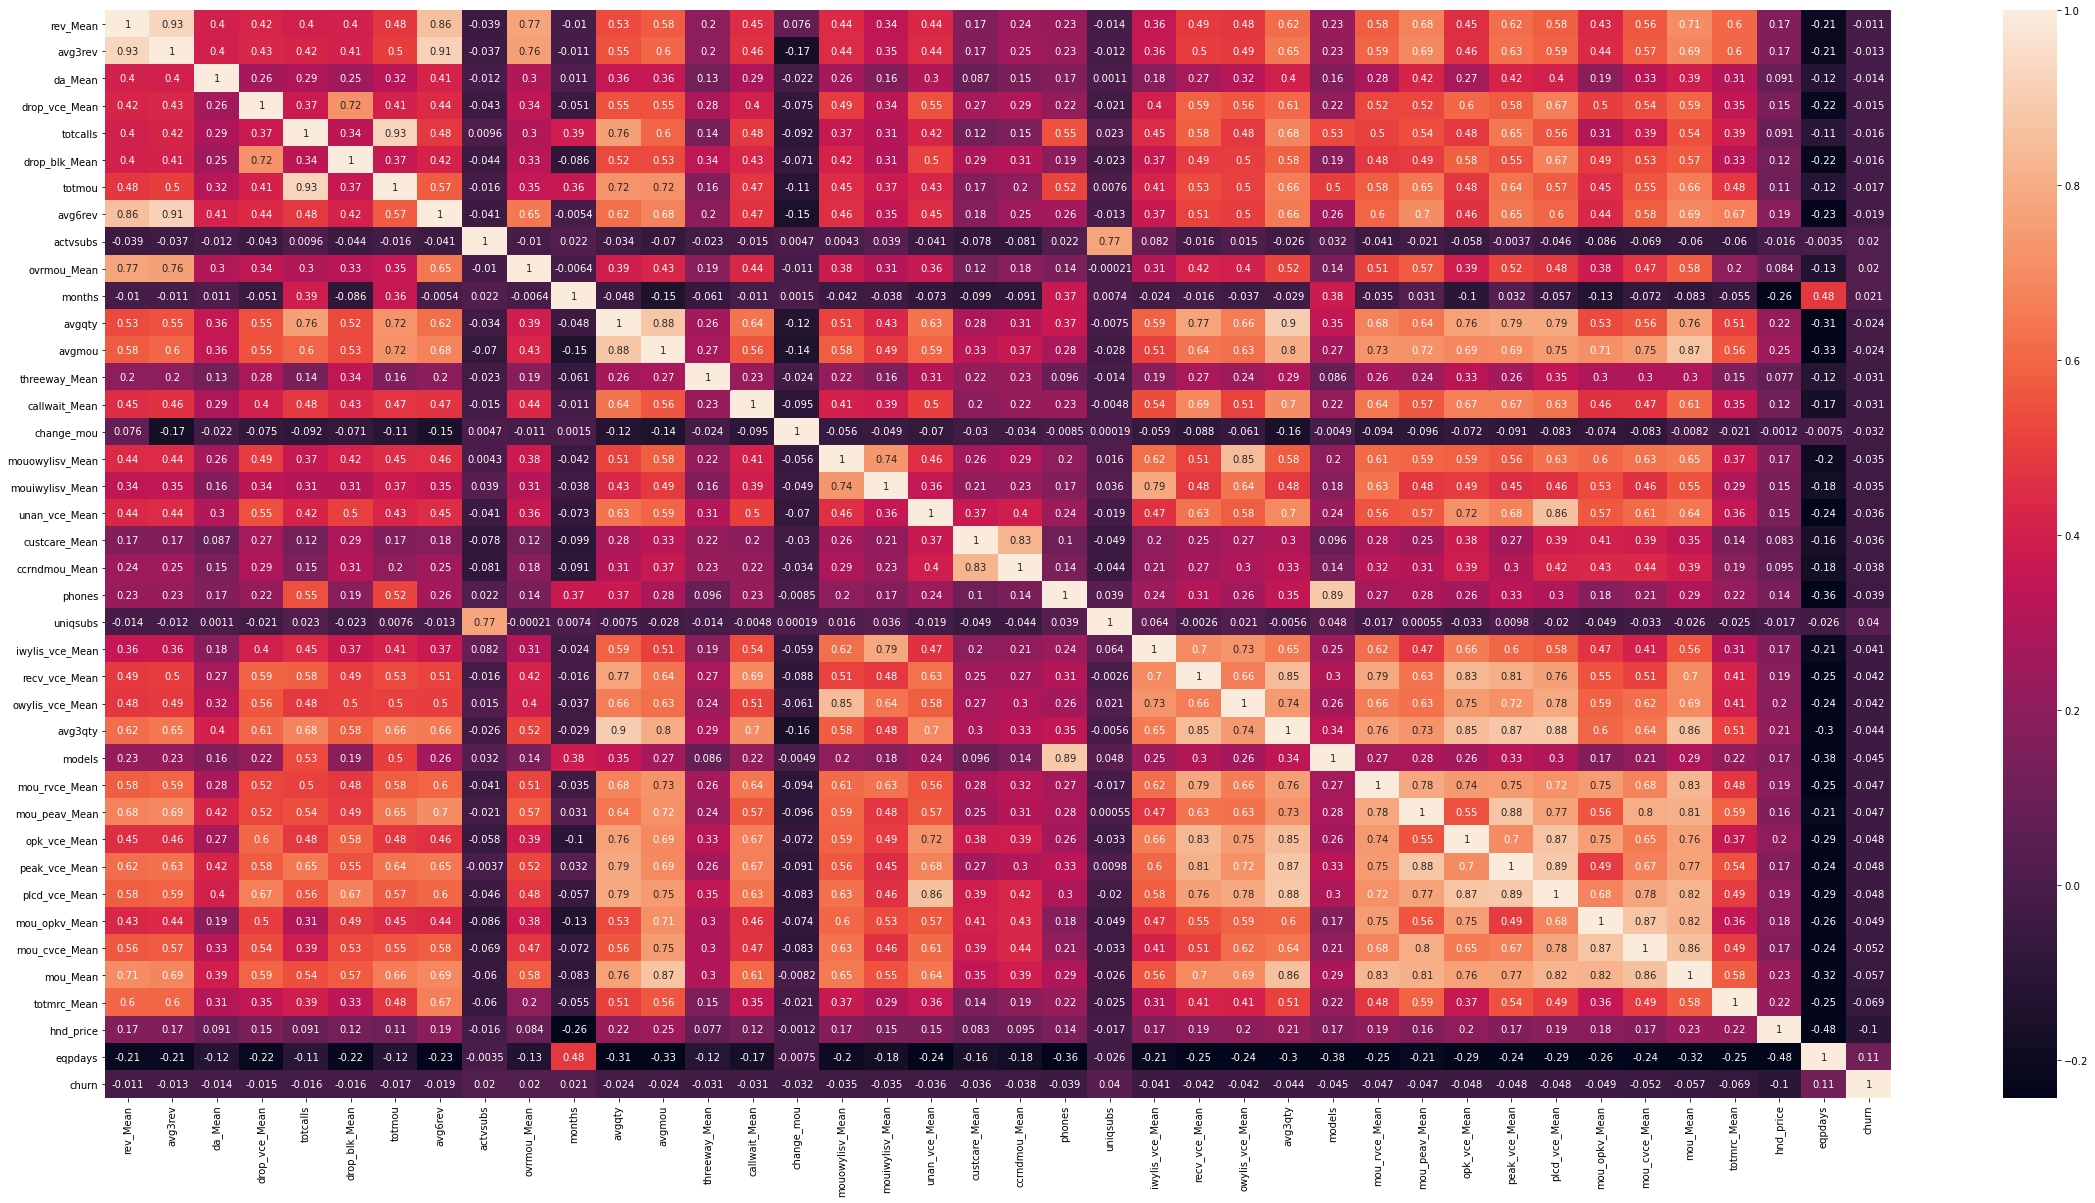

In [96]:
# Create correlation matrix
corr_matrix = df.corr().abs()
# print(corr_matrix)

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# Drop features 
df.drop(df[to_drop], axis=1,inplace=True)

c = df.corr()['churn'].abs()
sc = c.sort_values()
sc

a = dict(sc.tail(40))
b = a.keys()
print(sorted(b))

df2 = df.copy()

plt.figure(figsize=(40,20))
sns.heatmap(df2[b].corr(), annot = True, robust = True)
plt.show()

(100000, 99)